<a href="https://colab.research.google.com/github/Lux316/Bayesian_Project/blob/main/COPIA_3_dataw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')
import re, string
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Exploratory Data Analysis

In [ ]:
url_test = 'https://media.githubusercontent.com/media/nluninja/nlp_datasets/main/ag_news/data/test.csv'
url_train = 'https://media.githubusercontent.com/media/nluninja/nlp_datasets/main/ag_news/data/train.csv'



df_train = pd.read_csv(url_train, header=None, engine = 'python')
df_test = pd.read_csv(url_test, header=None, engine = 'python')

df_train.rename(columns={0:"Topic", 1:"Title", 2:"Description"}, inplace= True)
df_test.rename(columns={0:"Topic", 1:"Title", 2:"Description"}, inplace= True)

In [ ]:
df_train.head()

Topic                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [ ]:
#check for missing values
df_train.isnull().sum()

Topic          0
Title          0
Description    0
dtype: int64

In [ ]:
# check the duplicated data
df_train.duplicated().sum()

0

#### Is the Dataset Balanced or Imbalanced?

An unbalanced dataset can be a problem, so we need to know.

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
total_train = {'Topics' : ['World', 'Sport', 'Business', 'Sci-Tech'], 'Total' : [df_train['Topic'].isin([1]).sum(), df_train['Topic'].isin([2]).sum(),
           df_train['Topic'].isin([3]).sum(), df_train['Topic'].isin([4]).sum()]}
df_total_train = pd.DataFrame(total_train)
df_total_train

Topics  Total
0     World  30000
1     Sport  30000
2  Business  30000
3  Sci-Tech  30000

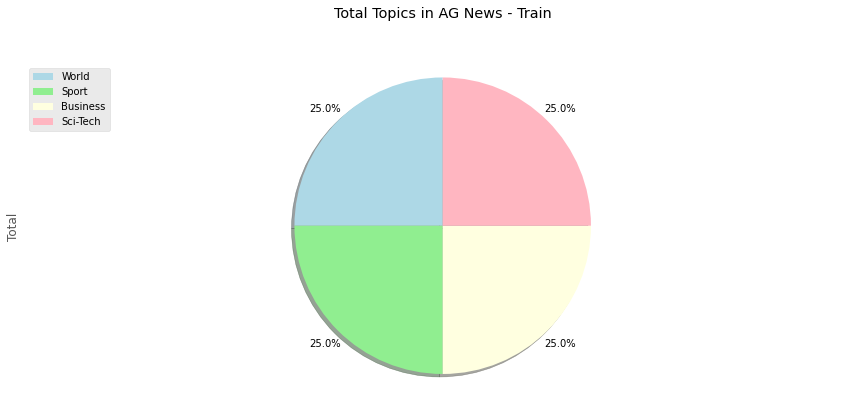

In [ ]:
colors_list = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink']

df_total_train['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('Total Topics in AG News - Train', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=['World', 'Sport', 'Business', 'Sci-Tech'], loc='upper left') 

plt.show()

An balanced dataset it's not a problem and accuracy metrics is sufficient to evaluate the performance of the models.

#### Word Clouds Using Unprocessed Text

In [ ]:
#Create a new column which contains Title and Description 
df_train['Title + Description'] = df_train['Title'] + pd.DataFrame({'Spaces': [' ' for i in range(len(df_train.index))]})['Spaces'] + df_train['Description']
df_train.head()

df_test['Title + Description'] = df_test['Title'] + pd.DataFrame({'Spaces': [' ' for i in range(len(df_train.index))]})['Spaces'] + df_test['Description']

In [ ]:
# set the random state
random_state = 2022

# import the wordcloud library
from wordcloud import WordCloud

# concat all the text for each labels
world_text_train = [''.join(t) for t in df_train[df_train['Topic']==1]['Title + Description']]
world_text_train_strings = ' '.join(map(str, world_text_train))

sport_text_train = [''.join(t) for t in df_train[df_train['Topic']==2]['Title + Description']]
sport_text_train_strings = ' '.join(map(str, sport_text_train))

business_text_train = [''.join(t) for t in df_train[df_train['Topic']==3]['Title + Description']]
business_text_train_strings = ' '.join(map(str, business_text_train))

scitech_text_train = [''.join(t) for t in df_train[df_train['Topic']==4]['Title + Description']]
scitech_text_train_strings = ' '.join(map(str, scitech_text_train))

# generate word clouds
world_cloud = WordCloud(width=800, height=400, max_words=1000,
                        background_color='white', 
                        random_state=random_state).generate(world_text_train_strings)
sport_cloud = WordCloud(width=800, height=400, max_words=1000, 
                        background_color='white',
                        random_state=random_state).generate(sport_text_train_strings)
business_cloud = WordCloud(width=800, height=400, max_words=1000, 
                           background_color='white', 
                           random_state=random_state).generate(business_text_train_strings)
scitech_cloud = WordCloud(width=800, height=400, max_words=1000, 
                          background_color='white', 
                          random_state=random_state).generate(scitech_text_train_strings)

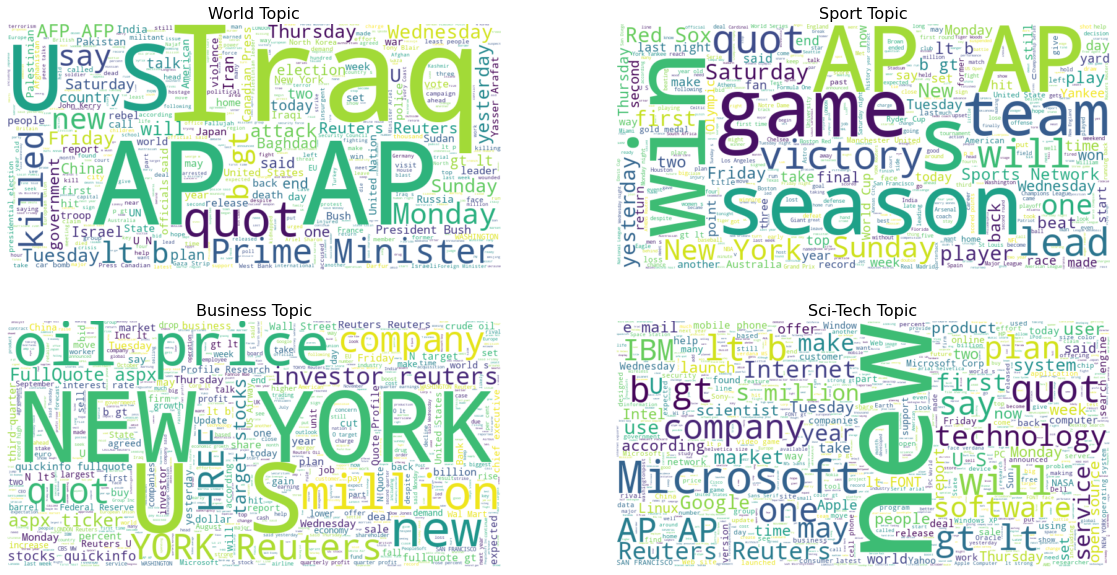

In [ ]:
# create subplots for the generated clouds
fig, axes = plt.subplots(2, 2, figsize = (20,10))
axes[0,0].imshow(world_cloud, interpolation='bilinear')
axes[0,1].imshow(sport_cloud, interpolation='bilinear')
axes[1,0].imshow(business_cloud, interpolation='bilinear')
axes[1,1].imshow(scitech_cloud, interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes.ravel()]

# add titles
axes[0,0].set_title('World Topic', fontsize=16)
axes[0,1].set_title('Sport Topic', fontsize=16)
axes[1,0].set_title('Business Topic', fontsize=16)
axes[1,1].set_title('Sci-Tech Topic', fontsize=16)

# show the figure
plt.show()

##Text Preprocessing
---

#####Remove links

We saw that some links are present in the dataset, for the analysis links are not useful.

In [ ]:
df_train['Description'][df_train.Description.str.contains('http')].count()

1791

In [ ]:
df_train['Description'][df_train.Description.str.contains('http')].tail()

119394     NEW YORK (Reuters) - U.S. stocks closed lower...
119415     NEW YORK (Reuters) - American Express &lt;A H...
119447     SAN FRANCISCO (Reuters) - Apple Computer Inc....
119570     DETROIT (Reuters) - DaimlerChrysler AG &lt;A ...
119978     CHICAGO (Reuters) - Wal-Mart Stores Inc. &lt;...
Name: Description, dtype: object

In [ ]:
df_train['Description'][119394]

' NEW YORK (Reuters) - U.S. stocks closed lower on Friday,  weighed down by a number of negative reports from top drug  makers, including Pfizer Inc. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=PFE.N target=/stocks/quickinfo/fullquote"&gt;PFE.N&lt;/A&gt;, and a \\$2 jump in the  price of crude oil.'

In [ ]:
# define a function that removes links from the text
def remove_links(text):
    text = re.sub(r'(("https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*")', '', text)
    return text

# remove URLs from the text and show the modified text in a new column
df_train['Text Cleaned'] = df_train['Title + Description'].apply(remove_links)
df_test['Text Cleaned'] = df_test['Title + Description'].apply(remove_links)

#####Remove S and other letters

In [ ]:
print( 'S: ', df_train['Description'][df_train.Description.str.contains(' S ')].count())
print( 'lt: ', df_train['Description'][df_train.Description.str.contains(' lt')].count())
print( 'gt: ', df_train['Description'][df_train.Description.str.contains(' gt')].count())
print( 'b: ', df_train['Description'][df_train.Description.str.contains(' b ')].count())

S:  47
lt:  4
gt:  34
b:  4


In [ ]:
print('----- S -----\n', df_train['Description'][df_train.Description.str.contains(' S ')].tail())
print('----- lt -----\n', df_train['Description'][df_train.Description.str.contains(' lt')].tail())
print('----- gt -----\n', df_train['Description'][df_train.Description.str.contains(' gt')].tail())
print('----- b -----\n', df_train['Description'][df_train.Description.str.contains(' b ')].tail())

----- S -----
 106956    Buying takes off after the price of crude fall...
107741    You don #39;t have to look around for long to ...
118329     NEW YORK (Reuters) - U.S. blue chips closed h...
118379    In the increasingly competitive RFID arena, IB...
118461     NEW YORK (Reuters) - U.S. blue chips closed s...
Name: Description, dtype: object
----- lt -----
 15798     Toshiba Corporation ( quot;Toshiba quot;) and ...
26022     Japan #39;s Suzuki Motor Corp.  lt;7269.T gt; ...
106732    The Dow Jones industrial average  lt;.DJI gt; ...
119300    NTT DoCoMo used its proprietary signal separat...
Name: Description, dtype: object
----- gt -----
 98190     CQ quot; gt; Walt Disney Company shareholders ...
103251    Sports India: Cricket  gt; Kolkata, Nov 28 : S...
106732    The Dow Jones industrial average  lt;.DJI gt; ...
112874    World News  gt; Dhaka, Dec 10 : A Bangladeshi ...
118658    India News  gt; Hyderabad, Dec 16 : A species ...
Name: Description, dtype: object
----- b -----


#####Remove HTML tags

In [ ]:
# define a function that removes HTML tags
def remove_HTML(text):
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'HREF', '', text)   # The HTML code used to create a link to another page
  return text

# remove HTML tags
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_HTML)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_HTML)

##### Remove sources

From the Clouds with raw text, we found some words which don't know the meaning, like AP, AFP, Reuters. 
We found that them are the sources of the articles.

* [AP](https://apnews.com) - Assosiated Press News 
* [AFP](https://www.afp.com/en/news-hub) - Agence France-Presse
* [Reuters](https://www.reuters.com/)

In [ ]:
# define a function that removes AP and AFP from the text
def remove_sources(text):
    text = re.sub(r'AP', '', text)
    text = re.sub(r'AFP', '', text)
    text = re.sub(r'Reuters', '', text)
    text = re.sub(r' S ', '', text)     ### DA RIVEDERE SOPRA
    return text

# remove URLs from the text and show the modified text in a new column
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_sources)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_sources)

#####Remove Numeric Values

In [ ]:
# define a function that removes numeric values and mixtures
def remove_num(text):
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

# remove numeric values and mixtures
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_num)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_num)

#####Remove Symbols



In [ ]:
# define a function that removes symbols like & - \

def remove_symbols(text):
    text = re.sub(r'&[a-zA-Z]+;?', '', text)
    text = re.sub(r'[a-zA-Z]/[a-zA-Z]', '', text)
    text = text.replace("-", "")
    text = text.replace(".", "")
    text = text.replace("\\", " ") 
    text = text.replace("(", "")
    text = text.replace(")", "")  
    text = text.replace(",", "")
    text = text.replace("'", "")
    return text

# remove symbols from the text and show the modified text in a new column
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_symbols)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_symbols)

#####Remove Non-printable Characters

In [ ]:
# define a function that removes non-printable characters
def remove_non_printable(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# remove non-printable characters
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_non_printable)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_non_printable)

In [ ]:
# check the results
df_train.head()

Topic                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  \
0  Reuters - Short-sellers, Wall Street's dwindli...   
1  Reuters - Private investment firm Carlyle Grou...   
2  Reuters - Soaring crude prices plus worries\ab...   
3  Reuters - Authorities have halted oil export\f...   
4  AFP - Tearaway world oil prices, toppling reco...   

                                 Title + Description  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        Text Cleaned  
0  Wall St Bears Claw Back Into the Black    Shor...  
1  Carlyle Looks Toward Commercial Aerospace    P...  
2  Oil and Economy Cloud Stocks Outlook    Soarin...  
3  Iraq Halts Oil Exports from Main Southern Pipe...  
4  Oil prices soar to alltime record posing new m...

In [ ]:
# check the results
df_test.tail()

Topic                                              Title  \
7595      1                                   Around the world   
7596      2                        Void is filled with Clement   
7597      2                             Martinez leaves bitter   
7598      3  5 of arthritis patients in Singapore take Bext...   
7599      3                             EBay gets into rentals   

                                            Description  \
7595  Ukrainian presidential candidate Viktor Yushch...   
7596  With the supply of attractive pitching options...   
7597  Like Roger Clemens did almost exactly eight ye...   
7598  SINGAPORE : Doctors in the United States have ...   
7599  EBay plans to buy the apartment and home renta...   

                                    Title + Description  \
7595  Around the world Ukrainian presidential candid...   
7596  Void is filled with Clement With the supply of...   
7597  Martinez leaves bitter Like Roger Clemens did ...   
7598  5 of arthritis patients in Singapore take Bext...   
7599  EBay gets into rentals EBay plans to buy the a...   

                                           Text Cleaned  
7595  Around the world Ukrainian presidential candid...  
7596  Void is filled with Clement With the supply of...  
7597  Martinez leaves bitter Like Roger Clemens did ...  
7598   of arthritis patients in Singapore take Bextr...  
7599  EBay gets into rentals EBay plans to buy the a...

##Feature Engineering

Below are 6 features we're going to create:

* Number of sentences
* Number of words
* Number of characters
* Average length of words
* Number of proper nouns (PROPN)
* Number of non-proper nouns (NOUN)

#####Number of Sentences

In [ ]:
# create a new feature for the number of sentences in each Tweet
df_train['sent_count'] = df_train['Title + Description'].apply(nltk.tokenize.sent_tokenize).apply(len)
df_test['sent_count'] = df_test['Title + Description'].apply(nltk.tokenize.sent_tokenize).apply(len)

#####Number of Words

In [ ]:
# create a new feature for the number of words
df_train['word_count'] = df_train['Title + Description'].apply(nltk.tokenize.word_tokenize).apply(len)
df_test['word_count'] = df_test['Title + Description'].apply(nltk.tokenize.word_tokenize).apply(len)

#####Number of Characters

In [ ]:
# create a new feature for the number of characters excluding white spaces
df_train['char_count'] = df_train['Title + Description'].apply(lambda x: len(x) - x.count(" "))
df_test['char_count'] = df_test['Title + Description'].apply(lambda x: len(x) - x.count(" "))

#####Average Length of words

In [ ]:
# define a function that returns the average length of words
def avg_word_len(string):
    words = string.split()
    total_len = sum([len(words[i]) for i in range(len(words))])
    avg_len = round(total_len / len(words), 2)
    return avg_len

# create a new feature for the average length of words
df_train['avg_word_len'] = df_train['Title + Description'].apply(avg_word_len)
df_test['avg_word_len'] = df_test['Title + Description'].apply(avg_word_len)

#####Number of Proper Nouns (PROPN)

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# test how nltk worked with the first text
string = "Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market.	"
print([(token, tag) for (token, tag) in nltk.pos_tag(nltk.word_tokenize(string)) if tag == 'NNP'])

[('Carlyle', 'NNP'), ('Looks', 'NNP'), ('Toward', 'NNP'), ('Commercial', 'NNP'), ('Aerospace', 'NNP'), ('Reuters', 'NNP'), ('Carlyle', 'NNP'), ('Group', 'NNP')]


In [ ]:
# check the same string with spaCy
print([(token.text, token.pos_) for token in nlp(string) if token.pos_=='PROPN'])

[('Carlyle', 'PROPN'), ('Toward', 'PROPN'), ('Commercial', 'PROPN'), ('Aerospace', 'PROPN'), ('Reuters', 'PROPN'), ('Reuters', 'PROPN'), ('Carlyle', 'PROPN'), ('Group', 'PROPN')]


In [ ]:
# define a function that returns number of proper nouns with spaCy
def propn_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
df_train['propn_count'] = df_train['Title + Description'].apply(propn_count)
df_test['propn_count'] = df_test['Title + Description'].apply(propn_count)

KeyboardInterrupt: ignored

#####Number of Non-proper Nouns (NOUN)

In [ ]:
# define a function that returns number of non-proper nouns
def noun_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')

# create a new feature for numbers of non-proper nouns
df_train['noun_count'] = df_train['Title + Description'].apply(noun_count)
df_test['noun_count'] = df_test['Title + Description'].apply(noun_count)

In [ ]:
# check the results
df_train[['Title + Description', 'Text Cleaned', 'word_count', 'char_count', 'propn_count','noun_count']].head()

Title + Description  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        Text Cleaned  word_count  char_count  \
0  Wall St Bears Claw Back Into the Black    Shor...          27         124   
1  Carlyle Looks Toward Commercial Aerospace    P...          42         231   
2  Oil and Economy Cloud Stocks Outlook    Soarin...          40         197   
3  Iraq Halts Oil Exports from Main Southern Pipe...          40         221   
4  Oil prices soar to alltime record posing new m...          43         198   

   propn_count  noun_count  
0           10           2  
1            8           9  
2            6          10  
3           12           7  
4            5          14

##Text Preprocessing
---

#####Lemmatization

In [ ]:
# lemmatize the text
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))

#####Convert the Text to Lowercase

In [ ]:
# lowercase the text
df_train['Text Cleaned'] = [t.lower() for t in df_train['Text Cleaned'] ]
df_test['Text Cleaned']  = [t.lower() for t in df_test['Text Cleaned'] ]

#####Remove Repeated Charcters in Elongated Words

In [ ]:
# define a function that removes repeated characters in elongated words
def remove_repeated(text):
    elongated = re.compile(r'(\S*?)([a-z])\2{2,}')
    text = elongated.sub(r'\1\2', text)
    return text

# remove repeated characters in elongated words
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_repeated)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_repeated)

#####Remove Stopwords


In [ ]:
# define a function that removes stopwords
def remove_stopwords(text):
  stopwords = nlp.Defaults.stop_words
  text_nostop = ' '.join([token for token in text.split() if token not in stopwords])
  return text_nostop

df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_stopwords)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_stopwords)

#####Remove Punctuation

In [ ]:
import re, string
# define a function to remove punctuation
def remove_punct(text):
    punct = string.punctuation
    text_nospunct = ' '.join([token for token in text.split() if token not in punct])
    return text_nospunct

# remove punctuation
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_punct)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_punct)

In [ ]:
#check the results
df_train[['Title + Description', 'Text Cleaned']].head()

Title + Description  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        Text Cleaned  
0  wall st bears claw black shortsellers wall str...  
1  carlyle look commercial aerospace private inve...  
2  oil economy cloud stocks outlook soar crude pr...  
3  iraq halts oil exports main southern pipeline ...  
4  oil price soar alltime record pose new menace ...

#####Raw vs. Preprocessed Text with Word Clouds

In [ ]:
# concat all the preprocessed text for both labels
word_processed = [''.join(t) for t in df_train[df_train['Topic']==1]['Text Cleaned']]
word_processed_s = ' '.join(map(str, word_processed))

sport_processed = [''.join(t) for t in df_train[df_train['Topic']==2]['Text Cleaned']]
sport_processed_s = ' '.join(map(str, sport_processed))

business_processed = [''.join(t) for t in df_train[df_train['Topic']==3]['Text Cleaned']]
business_processed_s = ' '.join(map(str, business_processed))

scitech_processed = [''.join(t) for t in df_train[df_train['Topic']==4]['Text Cleaned']]
scitech_processed_s = ' '.join(map(str, scitech_processed))

# generate word clouds of the preprocessed text
word_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(word_processed_s)
sport_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(sport_processed_s)
business_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(business_processed_s)
scitech_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(scitech_processed_s)

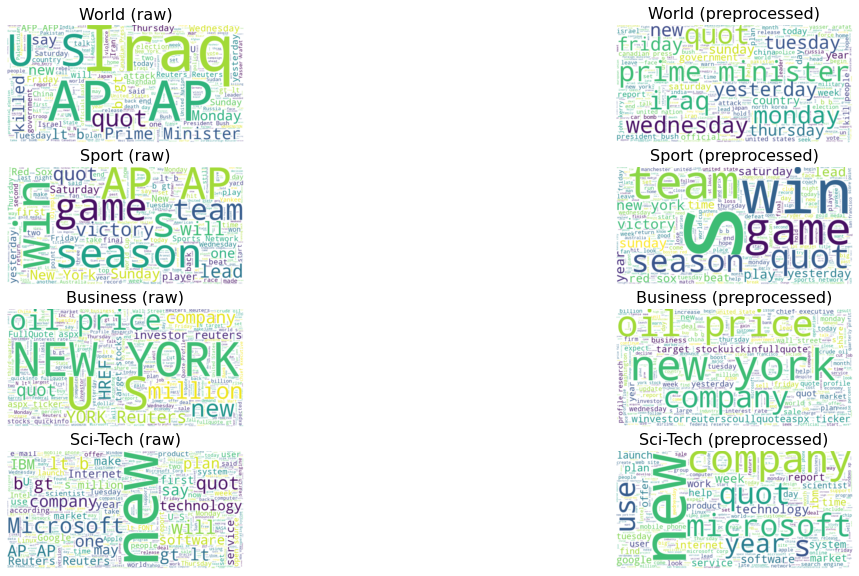

In [ ]:
# create subplots for the generated clouds
fig, axes = plt.subplots(4, 2, figsize = (20,10))
axes[0,0].imshow(world_cloud, interpolation='bilinear')
axes[0,1].imshow(word_processed_wc, interpolation='bilinear')
axes[1,0].imshow(sport_cloud, interpolation='bilinear')
axes[1,1].imshow(sport_processed_wc, interpolation='bilinear')
axes[2,0].imshow(business_cloud, interpolation='bilinear')
axes[2,1].imshow(business_processed_wc, interpolation='bilinear')
axes[3,0].imshow(scitech_cloud, interpolation='bilinear')
axes[3,1].imshow(scitech_processed_wc, interpolation='bilinear')
# turn the axis off
[ax.axis('off') for ax in axes.ravel()]

# add titles
axes[0,0].set_title('World (raw)', fontsize=16)
axes[0,1].set_title('World (preprocessed)', fontsize=16)
axes[1,0].set_title('Sport (raw)', fontsize=16)
axes[1,1].set_title('Sport (preprocessed)', fontsize=16)
axes[2,0].set_title('Business (raw)', fontsize=16)
axes[2,1].set_title('Business (preprocessed)', fontsize=16)
axes[3,0].set_title('Sci-Tech (raw)', fontsize=16)
axes[3,1].set_title('Sci-Tech (preprocessed)', fontsize=16)

# show the figure
plt.show()

In [ ]:
df_train.head()

Topic                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  \
0  Reuters - Short-sellers, Wall Street's dwindli...   
1  Reuters - Private investment firm Carlyle Grou...   
2  Reuters - Soaring crude prices plus worries\ab...   
3  Reuters - Authorities have halted oil export\f...   
4  AFP - Tearaway world oil prices, toppling reco...   

                                 Title + Description  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        Text Cleaned  sent_count  word_count  \
0  wall st bears claw black shortsellers wall str...           1          27   
1  carlyle look commercial aerospace private inve...           1          42   
2  oil economy cloud stocks outlook soar crude pr...           1          40   
3  iraq halts oil exports main southern pipeline ...           1          40   
4  oil price soar alltime record pose new menace ...           1          43   

   char_count  avg_word_len  propn_count  noun_count  
0         124          5.90           10           2  
1         231          6.42            8           9  
2         197          5.47            6          10  
3         221          6.14           12           7  
4         198          5.35            5          14

##### Visualizing Differences

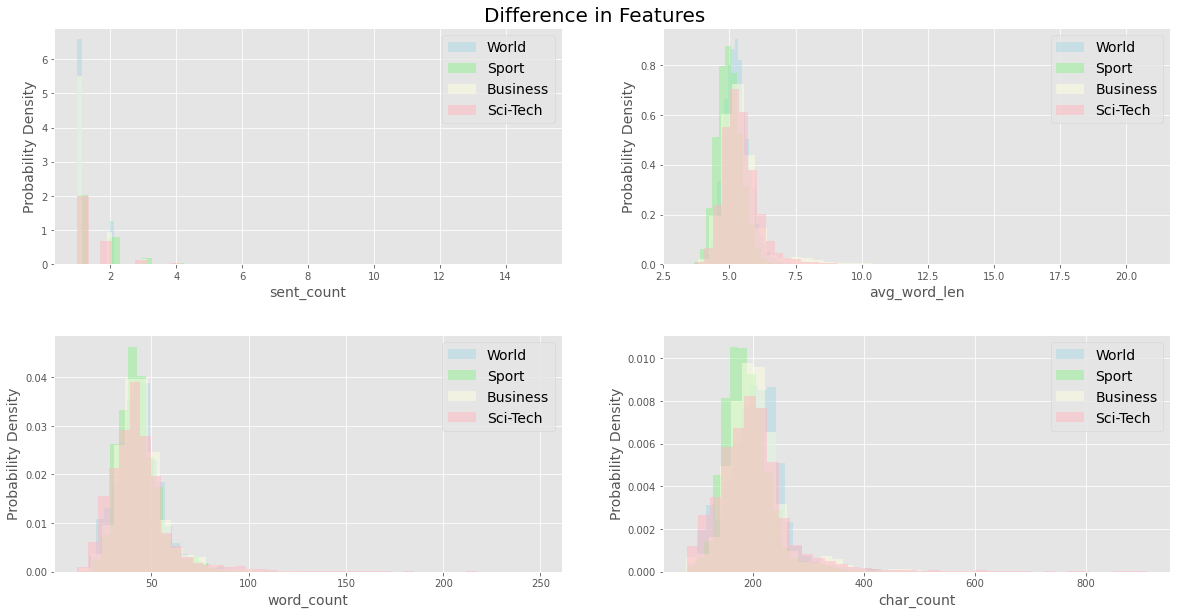

In [ ]:
# store the features and their names in variables
features = ['sent_count','avg_word_len', 'word_count', 'char_count']

# create the figure
fig = plt.figure(figsize=(20, 10))

# adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features", fontsize=20, y=0.91)

# generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    ax = df_train[df_train['Topic']==1][feature].hist(alpha=0.5, label='World', bins=40, color='lightblue', density=True)
    ax = df_train[df_train['Topic']==2][feature].hist(alpha=0.5, label='Sport', bins=40, color='lightgreen', density=True)
    ax = df_train[df_train['Topic']==3][feature].hist(alpha=0.5, label='Business', bins=40, color='lightyellow', density=True)
    ax = df_train[df_train['Topic']==4][feature].hist(alpha=0.5, label='Sci-Tech', bins=40, color='lightpink', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()

# Store an upgraded csv file 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train.to_csv(r'/content/drive/MyDrive/Text_Mining/Train_upgraded.csv', index=False)

In [ ]:
df_test.to_csv(r'/content/drive/MyDrive/Text_Mining/Test_upgraded.csv', index=False)

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Text_Mining/Train_upgraded.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Text_Mining/Test_upgraded.csv')

In [ ]:
df_train.head()

Topic                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  \
0  Reuters - Short-sellers, Wall Street's dwindli...   
1  Reuters - Private investment firm Carlyle Grou...   
2  Reuters - Soaring crude prices plus worries\ab...   
3  Reuters - Authorities have halted oil export\f...   
4  AFP - Tearaway world oil prices, toppling reco...   

                                 Title + Description  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        Text Cleaned  sent_count  word_count  \
0  wall st bears claw black shortsellers wall str...           1          27   
1  carlyle look commercial aerospace private inve...           1          42   
2  oil economy cloud stocks outlook soar crude pr...           1          40   
3  iraq halts oil exports main southern pipeline ...           1          40   
4  oil price soar alltime record pose new menace ...           1          43   

   char_count  avg_word_len  propn_count  noun_count  
0         124          5.90           10           2  
1         231          6.42            8           9  
2         197          5.47            6          10  
3         221          6.14           12           7  
4         198          5.35            5          14

# Topic Modelling 

## LDA

In [ ]:
# preprocessing
from sklearn.feature_extraction.text import CountVectorizer
#LDA
from sklearn.decomposition import LatentDirichletAllocation

### based only on Description

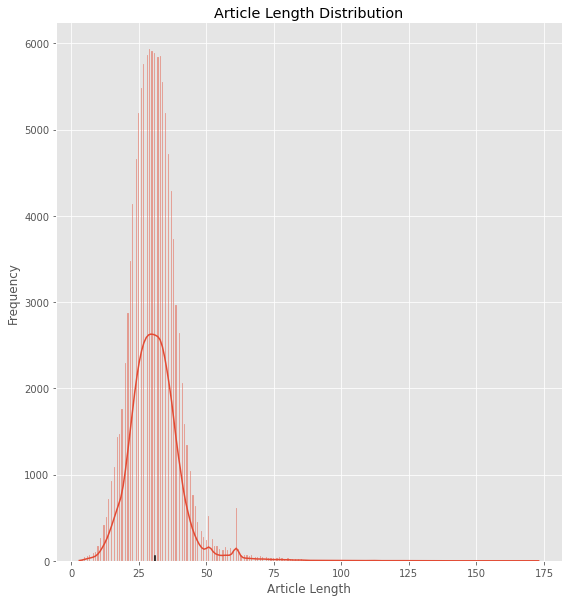

In [ ]:
import statistics
import seaborn as sns
df_train["Words Per Description"] = df_train["Description"].str.split().apply(len)
n_words_list = df_train['Words Per Description'].values.tolist()

word_mean = statistics.mean(n_words_list)
sns.displot(n_words_list, height = 8, kind = "hist", kde = True)
plt.title("Article Length Distribution")
plt.xlabel("Article Length")
plt.ylabel("Frequency")

plt.plot([word_mean, word_mean], [0, 61], color = "k")

del df_train['Words Per Description']
     

In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df_train['Description'])
dtm


<120000x3325 sparse matrix of type '<class 'numpy.int64'>'
	with 1688732 stored elements in Compressed Sparse Row format>

In [ ]:
LDA = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=4, random_state=42)

 Showing stored words

In [ ]:
len(cv.get_feature_names_out())

3325

In [ ]:
len(cv.get_feature_names())
#cv.get_feature_names_out()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3325

showing top words per topic

In [ ]:
len(LDA.components_)

4

In [ ]:
LDA.components_

array([[8.61281127e+02, 2.48770368e+01, 4.09402995e+01, ...,
        2.50757993e-01, 2.52367801e-01, 2.32839860e+01],
       [5.07149357e+02, 6.78337454e+01, 1.03506949e+02, ...,
        2.50469923e-01, 7.37608619e+01, 8.99596918e+01],
       [2.88698964e+02, 3.34134255e+01, 2.99236020e-01, ...,
        1.39248525e+02, 2.50522320e-01, 2.61766907e-01],
       [8.57870553e+02, 2.68757922e+01, 2.53515544e-01, ...,
        2.50247225e-01, 1.21736248e+02, 1.93494555e+02]])

In [ ]:
len(LDA.components_[0])

3325

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['million', 'company', 'year', 'stocks', 'fullquote', 'prices', 'york', 'percent', '39', 'oil', 'lt', 'gt', 'new', 'said', 'reuters']


THE TOP 15 WORDS FOR TOPIC #1
['quot', 'time', 'league', 'victory', 'sunday', 'win', 'year', 'world', 'team', 'night', 'season', 'ap', 'new', 'game', '39']


THE TOP 15 WORDS FOR TOPIC #2
['announced', 'technology', 'said', 'service', 'computer', 'quot', 'corp', 'lt', 'gt', 'internet', 'microsoft', 'software', 'company', 'new', '39']


THE TOP 15 WORDS FOR TOPIC #3
['monday', 'wednesday', 'yesterday', 'united', 'officials', 'minister', 'government', 'ap', 'people', 'quot', 'iraq', 'reuters', 'president', '39', 'said']




In [ ]:
dtm.shape

(120000, 3325)

In [ ]:
topic_result = LDA.transform(dtm)

In [ ]:
topic_result.shape

(120000, 4)

In [ ]:
topic_result

array([[0.56586785, 0.35296882, 0.04392413, 0.0372392 ],
       [0.45614061, 0.27954968, 0.24485656, 0.01945315],
       [0.94788813, 0.0169875 , 0.01834961, 0.01677476],
       ...,
       [0.01541347, 0.61917977, 0.09080986, 0.27459691],
       [0.03873974, 0.9180157 , 0.036763  , 0.00648155],
       [0.0169869 , 0.94931782, 0.01682257, 0.01687271]])

In [ ]:
df_train['Arg Max'] = topic_result.argmax(axis=1)

In [ ]:
len(df_train["Arg Max"])

120000

In [ ]:

counterWorld = 0
counterBusiness = 0
counterSport = 0
counterTech = 0
total_correct = 0
mismatching = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max"][i]== 3:
    counterWorld +=1
    total_correct +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max"][i]== 1:
    counterSport +=1
    total_correct +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max"][i]== 0:
    counterBusiness +=1
    total_correct +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max"][i]== 2:
    counterTech +=1
    total_correct +=1
  else: 
    mismatching.append(i)
    
print(f"The number of total correct guesses is:{total_correct}, World: {counterWorld}, Business: {counterBusiness}, Sport: {counterSport}, Tech: {counterTech}")
print(mismatching)

The number of total correct guesses is:94843, World: 26662, Business: 19642, Sport: 28642, Tech: 19897
[3, 15, 16, 20, 26, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 82, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 108, 110, 112, 113, 114, 115, 116, 117, 119, 120, 121, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 162, 164, 165, 166, 173, 175, 176, 177, 180, 181, 182, 185, 186, 187, 188, 189, 192, 197, 202, 203, 204, 207, 213, 214, 217, 218, 223, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 270, 271, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 

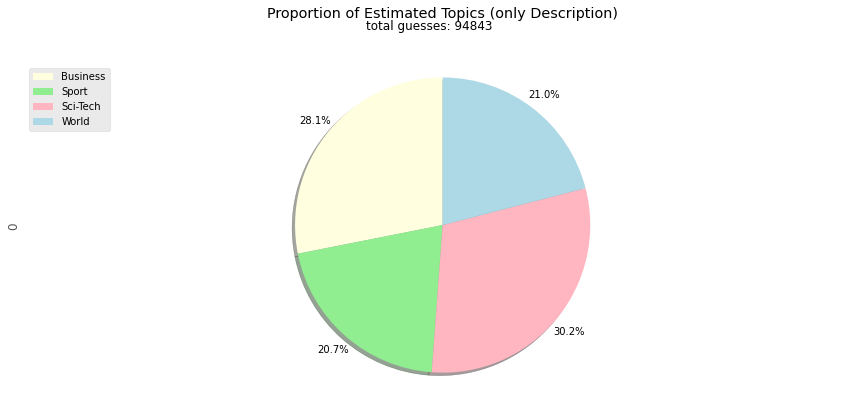

In [ ]:
# autopct create %, start angle represent starting point
A = [counterWorld,counterBusiness,counterSport,counterTech]
ArgMax = pd.DataFrame(A)

colors_list = ['lightyellow', 'lightgreen', 'lightpink', 'lightblue']

ArgMax[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                           

plt.title('Proportion of Estimated Topics (only Description)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Business', 'Sport', 'Sci-Tech', 'World'], loc='upper left') 


plt.show()

In [ ]:
import random
for i in range(3):
  n = random.randint(0,len(mismatching))
  print("index: ",mismatching[n])
  print(df_train["Description"][mismatching[n]])
  print("estimated: ", df_train["Arg Max"][mismatching[n]])
  print("real topic: ",df_train["Topic"][mismatching[n]])
  print("---")

index:  78801
WHEN members of the Early Stage Venture Capital Alliance gathered here last month for its annual golf outing, the conversation turned - as it invariably does when venture capitalists congregate 
estimated:  3
real topic:  3
---
index:  87427
With three teams in the preseason top four and six in the top 25, the ACC is loaded this year. However, it &lt;em&gt;is&lt;/em&gt; the preseason, and &lt;em&gt;nothing &lt;/em&gt;is certain in college basketball.
estimated:  0
real topic:  2
---
index:  22164
NASA #39;s \$264 million Genesis mission came to a sudden and violent end on Wednesday morning, when a capsule returning with samples of the Sun slammed into 
estimated:  1
real topic:  4
---


### based on Description + Title

In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')
dtm_TD = cv.fit_transform(df_train['Title + Description'])
dtm_TD

<120000x3785 sparse matrix of type '<class 'numpy.int64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
LDA_TD = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
LDA_TD.fit(dtm_TD)

LatentDirichletAllocation(n_components=4, random_state=42)

In [ ]:
len(cv.get_feature_names_out())

3785

In [ ]:
for idx, topic in enumerate(LDA_TD.components_):
    print(f"Top 15 words in Topic #{idx}:")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]]) 
    print('')

Top 15 words in Topic #0:
['officials', 'new', 'killed', 'quot', 'government', 'bush', 'people', 'minister', 'afp', 'president', 'iraq', 'reuters', 'ap', 'said', '39']

Top 15 words in Topic #1:
['web', 'ibm', 'technology', 'online', 'computer', 'search', 'said', 'service', 'quot', 'internet', 'company', 'software', 'microsoft', 'new', '39']

Top 15 words in Topic #2:
['quarter', 'company', 'fullquote', 'sales', 'york', 'percent', 'prices', 'stocks', 'new', '39', 'said', 'oil', 'reuters', 'lt', 'gt']

Top 15 words in Topic #3:
['time', 'cup', 'sunday', 'league', 'victory', 'year', 'world', 'night', 'team', 'season', 'win', 'new', 'game', 'ap', '39']



In [ ]:
dtm_TD

<120000x3785 sparse matrix of type '<class 'numpy.int64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
dtm_TD.shape

(120000, 3785)

In [ ]:
len(df_train)

120000

In [ ]:
topic_results_TD = LDA_TD.transform(dtm_TD)

In [ ]:
topic_results_TD.shape

(120000, 4)

In [ ]:
topic_results_TD[0]

array([0.01998063, 0.02059596, 0.50809645, 0.45132696])

In [ ]:
topic_results_TD[0].argmax()

2

In [ ]:
df_train['Arg Max T+D'] = topic_results_TD.argmax(axis=1)

In [ ]:
counterWorld_TD = 0
counterBusiness_TD = 0
counterSport_TD = 0
counterTech_TD = 0
total_correct_TD = 0
mismatching_TD = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max T+D"][i]== 0:
    counterWorld_TD +=1
    total_correct_TD +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max T+D"][i]== 3:
    counterSport_TD +=1
    total_correct_TD +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max T+D"][i]== 2:
    counterBusiness_TD +=1
    total_correct_TD +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max T+D"][i]== 1:
    counterTech_TD +=1
    total_correct_TD +=1
  else: 
    mismatching_TD.append(i)
    
print(f"The number of total correct guesses is:{total_correct_TD}, World: {counterWorld_TD}, Business: {counterBusiness_TD}, Sport: {counterSport_TD}, Tech: {counterTech_TD}")
print(mismatching_TD)

The number of total correct guesses is:97197, World: 26760, Business: 19451, Sport: 28788, Tech: 22198
[1, 3, 8, 13, 15, 16, 20, 26, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 82, 86, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 103, 106, 108, 110, 112, 113, 115, 120, 123, 125, 127, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 158, 162, 164, 165, 166, 173, 175, 176, 177, 180, 181, 182, 186, 187, 188, 189, 192, 197, 202, 203, 207, 210, 211, 212, 213, 214, 215, 216, 218, 220, 221, 223, 225, 227, 228, 229, 230, 233, 234, 235, 236, 238, 240, 241, 242, 243, 244, 246, 248, 249, 253, 255, 256, 258, 259, 260, 262, 264, 265, 266, 267, 275, 278, 282, 287, 290, 291, 292, 293, 294, 295, 297, 298, 299, 300, 301, 303, 304, 305, 306, 307, 309, 310, 313, 318, 320, 321, 322, 324, 328, 33

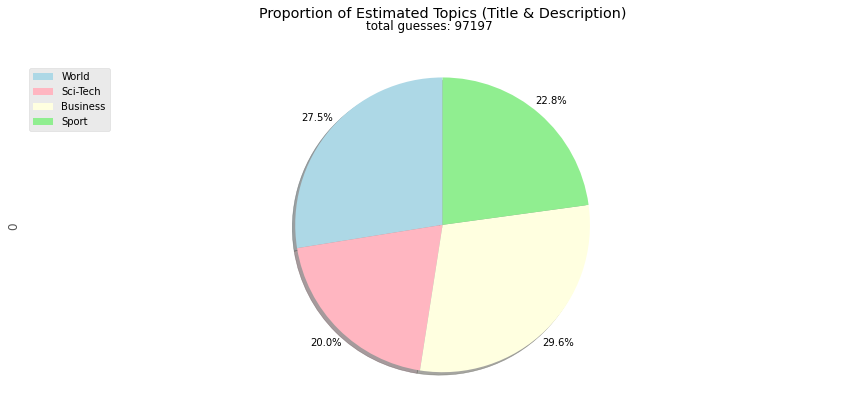

In [ ]:
# autopct create %, start angle represent starting point
A_TD = [counterWorld_TD,counterBusiness_TD,counterSport_TD,counterTech_TD]
ArgMax_TD = pd.DataFrame(A_TD)

colors_list = ['lightblue', 'lightpink', 'lightyellow', 'lightgreen']

ArgMax_TD[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                        

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics (Title & Description)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_TD}")
plt.axis('equal') 

# add legend
plt.legend(labels=['World', 'Sci-Tech', 'Business', 'Sport'], loc='upper left') 


plt.show()

In [ ]:
import random
for i in range(3):
  n = random.randint(0,len(mismatching_TD))
  print("index: ",mismatching_TD[n])
  print(df_train["Description"][mismatching_TD[n]])
  print("estimated: ", df_train["Arg Max T+D"][mismatching_TD[n]])
  print("real topic: ",df_train["Topic"][mismatching_TD[n]])
  print("---")

index:  66844
Bangalore, Oct. 20: Veerappans booty, amassed over 30 years and tucked away in 6,000 sq km of dense forest along the Karnataka-Tamil Nadu border, could be up for grabs.
estimated:  3
real topic:  1
---
index:  119287
An Australian gamer spends \$26,500 on a virtual island that exists only in a PC role-playing game.
estimated:  3
real topic:  1
---
index:  14420
JibJab.com, the site with the cartoon animation of President Bush and Sen. John Kerry trading barbs to the tune of  quot;This Land Is Your Land, quot; seems to be in the clear.
estimated:  0
real topic:  4
---


### based on cleaned text

In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')

In [ ]:
dtm_C = cv.fit_transform(df_train['Text Cleaned'])
dtm_C


<120000x3093 sparse matrix of type '<class 'numpy.int64'>'
	with 1782752 stored elements in Compressed Sparse Row format>

In [ ]:
LDA_C = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
LDA_C.fit(dtm_C)

LatentDirichletAllocation(n_components=4, random_state=42)

Showing stored words

In [ ]:
len(cv.get_feature_names_out())

3093

In [ ]:
len(cv.get_feature_names())
#cv.get_feature_names_out()

3093

showing top words per topic

In [ ]:
len(LDA_C.components_)

4

In [ ]:
LDA_C.components_

array([[7.62299410e+01, 2.51195903e-01, 1.11035111e+02, ...,
        2.51706503e-01, 1.76538380e+02, 4.62233863e+01],
       [7.46755521e+01, 1.57248376e+02, 2.63665898e-01, ...,
        2.78222680e+02, 2.63770476e-01, 2.99730792e+02],
       [3.75258923e+01, 2.50273485e-01, 3.28854581e+01, ...,
        2.53496468e-01, 1.05946790e+02, 7.75461951e+01],
       [6.85686147e+01, 2.50154511e-01, 1.02815765e+02, ...,
        2.72116768e-01, 2.51059718e-01, 4.99626995e-01]])

In [ ]:
len(LDA_C.components_[0])

3093

In [ ]:
for index,topic in enumerate(LDA_C.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['state', 'world', 'union', 'minister', 'plan', 'year', 'united', 'court', 'government', 'election', 'bush', 'oil', 'new', 'president', 'quot']


THE TOP 15 WORDS FOR TOPIC #1
['israeli', 'troop', 'palestinian', 'military', 'bomb', 'city', 'force', 'baghdad', 'iraqi', 'police', 'attack', 'official', 'people', 'iraq', 'kill']


THE TOP 15 WORDS FOR TOPIC #2
['coach', 'sunday', 'cup', 'league', 'play', 'year', 'victory', 'lead', 'world', 'night', 'season', 'new', 'team', 'game', 'win']


THE TOP 15 WORDS FOR TOPIC #3
['business', 'profit', 'report', 'market', 'software', 'service', 'percent', 'million', 'year', 'stock', 'corp', 'price', 'microsoft', 'company', 'new']




In [ ]:
dtm_C.shape

(120000, 3093)

In [ ]:
topic_result_C = LDA_C.transform(dtm_C)

In [ ]:
topic_result_C.shape

(120000, 4)

In [ ]:
topic_result_C

array([[0.03259115, 0.03297244, 0.51975814, 0.41467827],
       [0.0169368 , 0.01655982, 0.35945552, 0.60704787],
       [0.01317259, 0.01278719, 0.0129653 , 0.96107493],
       ...,
       [0.37569747, 0.01457817, 0.5952285 , 0.01449586],
       [0.00790549, 0.00757146, 0.90860909, 0.07591396],
       [0.01532801, 0.01480981, 0.95437871, 0.01548347]])

In [ ]:
df_train['Arg Max_C'] = topic_result_C.argmax(axis=1)

In [ ]:
len(df_train["Arg Max_C"])

120000

In [ ]:

counterWorld_C = 0
counterBusiness_C = 0
counterSport_C = 0
counterTech_C = 0
total_correct_C = 0
mismatching_C = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max_C"][i]== 2:
    counterWorld_C +=1
    total_correct_C +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max_C"][i]== 3:
    counterSport_C +=1
    total_correct_C +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max_C"][i]== 1:
    counterBusiness_C +=1
    total_correct_C +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max_C"][i]== 0:
    counterTech_C +=1
    total_correct_C +=1
  else: 
    mismatching_C.append(i)
    
print(f"The number of total correct guesses is:{total_correct_C}, World: {counterWorld_C}, Business: {counterBusiness_C}, Sport: {counterSport_C}, Tech: {counterTech_C}")
print(mismatching_C)

The number of total correct guesses is:9936, World: 1562, Business: 571, Sport: 205, Tech: 7598
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 94, 96, 97, 101, 105, 113, 126, 127, 137, 139, 142, 143, 156, 158, 159, 160, 163, 166, 167, 168, 171, 172, 176, 177, 178, 179, 183, 184, 186, 187, 190, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 221, 222, 224, 230, 231, 233, 247, 248, 252, 255, 256, 259, 260, 262, 268, 278, 282, 286, 291, 292, 298, 299, 308, 309, 310, 311, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345

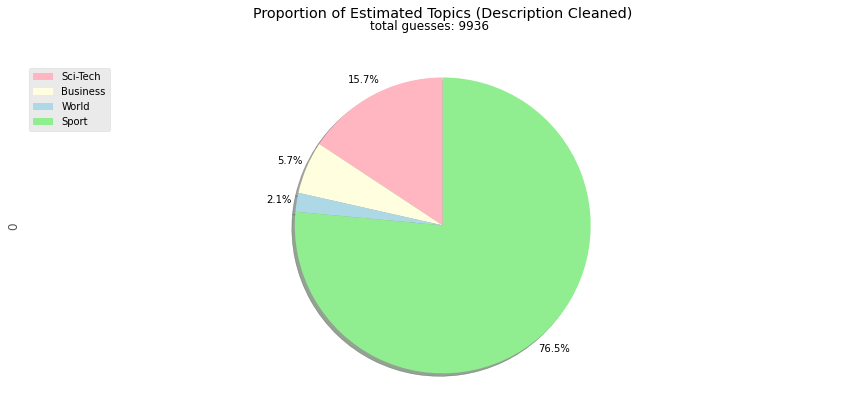

In [ ]:
# autopct create %, start angle represent starting point
A_C = [counterWorld_C,counterBusiness_C,counterSport_C,counterTech_C]
ArgMax_C = pd.DataFrame(A_C)

colors_list = ['lightpink', 'lightyellow', 'lightblue', 'lightgreen']

#explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

ArgMax_C[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            #)

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics (Description Cleaned)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_C}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Sci-Tech', 'Business', 'World', 'Sport'], loc='upper left') 


plt.show()

In [ ]:
import random
for i in range(3):
  n = random.randint(0,len(mismatching_C))
  print("index: ",mismatching_C[n])
  print(df_train["Description"][mismatching_C[n]])
  print("estimated: ", df_train["Arg Max"][mismatching_C[n]])
  print("real topic: ",df_train["Topic"][mismatching_C[n]])
  print("---")

index:  55390
Citigroup has sued Italian governmental authorities overseeing the Parmalat restructuring, arguing that their formula for paying off debt tramples creditors and investors rights.
estimated:  0
real topic:  3
---
index:  76754
Keith Foulke squeezed the ball tight. After all those years and all that heartache, the Boston Red Sox had the World Series firmly in hand.
estimated:  1
real topic:  2
---
index:  92877
OTTAWA - Canada is on track to post a budget surplus of \$5.9 billion when the federal government #39;s current fiscal year ends in March, Finance Minister Ralph Goodale said Tuesday.
estimated:  0
real topic:  3
---


## Non-Negative Matrix Factorization NNMF

### Title + description



Non-Negative Matrix Factorization is a statistical method to reduce the dimension of the input corpora. It uses factor analysis method to provide comparatively less weightage to the words with less coherence

In [ ]:
#NON-NEGATIVE MATRIC FACTORIZATION
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.25, min_df=0.001, stop_words='english')
dtm_nmf_TD = tfidf.fit_transform(df_train['Title + Description'])

In [ ]:
dtm_nmf_TD

<120000x3785 sparse matrix of type '<class 'numpy.float64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model_TD = NMF(n_components=4, random_state=42)

In [ ]:
nmf_model_TD.fit(dtm_nmf_TD)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=4, random_state=42)

In [ ]:
len(tfidf.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3785

In [ ]:
len(nmf_model_TD.components_)

4

In [ ]:
nmf_model_TD.components_

array([[0.14871055, 0.02088902, 0.02541452, ..., 0.01393522, 0.04051421,
        0.03436201],
       [0.00442666, 0.00624973, 0.00166327, ..., 0.        , 0.        ,
        0.        ],
       [0.13491076, 0.01044212, 0.0162336 , ..., 0.00990929, 0.00075762,
        0.01235803],
       [0.09282337, 0.00436777, 0.012192  , ..., 0.        , 0.0092669 ,
        0.02878217]])

In [ ]:
len(nmf_model_TD.components_[0])

3785

In [ ]:
single_topic_nmf_TD = nmf_model_TD.components_[0]

In [ ]:
single_topic_nmf_TD.argsort()

array([  73, 3722, 3023, ..., 3745, 2692,   54])

In [ ]:
single_topic_nmf_TD[73]

0.0

In [ ]:
single_topic_nmf_TD[2692]

2.0535093769560864

In [ ]:
single_topic_nmf_TD.argsort()[-10:]

array([3374, 3773, 3776, 1428, 2237, 2929, 2116, 3745, 2692,   54])

In [ ]:
top_word_indices_nmf_TD = single_topic_nmf_TD.argsort()[-10:]

In [ ]:
for index in top_word_indices_nmf_TD:
    print(tfidf.get_feature_names()[index])

team
year
yesterday
game
new
said
microsoft
world
quot
39


In [ ]:
for index,topic in enumerate(nmf_model_TD.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['cup', 'time', 'says', 'today', 'company', 'team', 'year', 'yesterday', 'game', 'new', 'said', 'microsoft', 'world', 'quot', '39']


THE TOP 15 WORDS FOR TOPIC #1
['font', 'reuters', 'stocks', 'target', 'investor', 'com', 'quickinfo', 'aspx', 'ticker', 'www', 'href', 'http', 'fullquote', 'gt', 'lt']


THE TOP 15 WORDS FOR TOPIC #2
['company', 'crude', 'tuesday', 'higher', 'sales', 'quarter', 'profit', 'percent', 'york', 'said', 'stocks', 'new', 'prices', 'oil', 'reuters']


THE TOP 15 WORDS FOR TOPIC #3
['john', 'victory', 'state', 'season', '151', 'saturday', 'sunday', 'night', 'kerry', 'said', 'game', 'president', 'iraq', 'bush', 'ap']




SyntaxError: ignored

In [ ]:
dtm_nmf_TD

<120000x3785 sparse matrix of type '<class 'numpy.float64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
dtm_nmf_TD.shape

(120000, 3785)

In [ ]:
len(df_train)

120000

In [ ]:
topic_results_nmf_TD = nmf_model_TD.transform(dtm_nmf_TD)

In [ ]:
topic_results_nmf_TD.shape

(120000, 4)

In [ ]:
topic_results_nmf_TD[0]

array([0.        , 0.00071928, 0.03377613, 0.        ])

In [ ]:
topic_results_nmf_TD[0].round(2)

array([0.  , 0.  , 0.03, 0.  ])

In [ ]:
topic_results_nmf_TD[0].argmax()

2

In [ ]:
topic_results_nmf_TD.argmax(axis=1)

array([2, 2, 2, ..., 3, 3, 0])

In [ ]:
df_train['Arg Max T+D_nmf'] = topic_results_nmf_TD.argmax(axis=1)

In [ ]:
counterWorld_nmf_TD = 0
counterBusiness_nmf_TD = 0
counterSport_nmf_TD = 0
counterTech_nmf_TD = 0
total_correct_nmf_TD = 0
mismatching_nmf_TD = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max T+D_nmf"][i]== 1:
    counterWorld_nmf_TD +=1
    total_correct_nmf_TD +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max T+D_nmf"][i]== 3:
    counterSport_nmf_TD +=1
    total_correct_nmf_TD +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max T+D_nmf"][i]== 2:
    counterBusiness_nmf_TD +=1
    total_correct_nmf_TD +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max T+D_nmf"][i]== 0:
    counterTech_nmf_TD +=1
    total_correct_nmf_TD +=1
  else: 
    mismatching_nmf_TD .append(i)
    
print(f"The number of total correct guesses is:{total_correct_nmf_TD }, World: {counterWorld_nmf_TD }, Business: {counterBusiness_nmf_TD }, Sport: {counterSport_nmf_TD }, Tech: {counterTech_nmf_TD }")
print(mismatching_nmf_TD )

The number of total correct guesses is:41782, World: 982, Business: 20413, Sport: 10222, Tech: 10165
[6, 15, 16, 34, 39, 40, 41, 52, 56, 57, 59, 63, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 165, 167, 173, 175, 176, 177, 179, 180, 181, 185, 186, 187, 188, 189, 190, 191, 194, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 224, 226, 228, 229, 230, 231, 233, 234, 235, 238, 240, 242, 244, 245, 246, 247, 248, 250, 253, 255, 257, 259, 260, 261, 262, 263, 264, 265, 266, 269, 273, 274, 275, 276, 279, 281, 282, 284, 285, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302

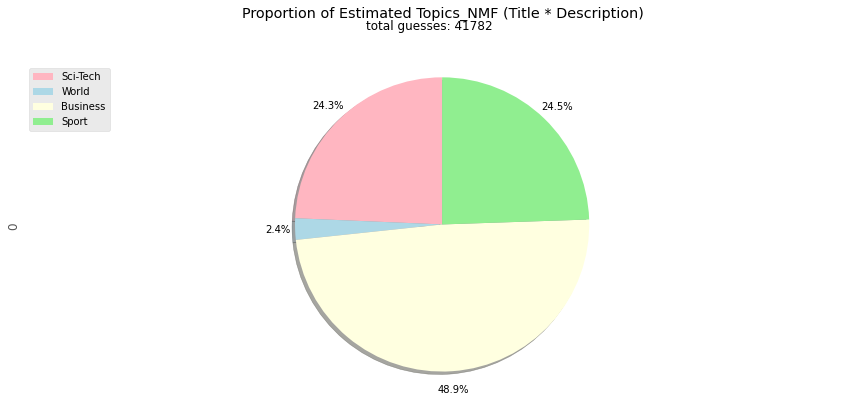

In [ ]:
# autopct create %, start angle represent starting point
A_nmf_TD = [counterTech_nmf_TD,counterWorld_nmf_TD,counterBusiness_nmf_TD,counterSport_nmf_TD]
ArgMax_nmf_TD = pd.DataFrame(A_nmf_TD)

colors_list = ['lightpink', 'lightblue', 'lightyellow', 'lightgreen']

#explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

ArgMax_nmf_TD[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            #)

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics_NMF (Title * Description)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_nmf_TD}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Sci-Tech', 'World', 'Business', 'Sport'], loc='upper left') 


plt.show()

### Cleaned Text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_C_NMF = TfidfVectorizer(max_df=0.25, min_df=0.001, stop_words='english')

In [ ]:
dtm_C_NMF = tfidf_C_NMF.fit_transform(df_train['Text Cleaned'])

In [ ]:
dtm_C_NMF

<120000x3093 sparse matrix of type '<class 'numpy.float64'>'
	with 1782752 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model_C_NMF = NMF(n_components=4,random_state=42)

In [ ]:
nmf_model_C_NMF.fit(dtm_C_NMF)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=4, random_state=42)

In [ ]:
#Displayin Topics
len(tfidf_C_NMF.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3093

In [ ]:
len(nmf_model_C_NMF.components_)

4

In [ ]:
nmf_model_C_NMF.components_

array([[0.01979501, 0.        , 0.03351883, ..., 0.05301747, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00100441, ..., 0.        , 0.        ,
        0.00531405],
       [0.02256967, 0.04555233, 0.00672141, ..., 0.        , 0.02177743,
        0.08061423],
       [0.00672335, 0.        , 0.0085192 , ..., 0.        , 0.02013204,
        0.01418331]])

In [ ]:
for index,topic in enumerate(nmf_model_C_NMF.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_C_NMF.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')
  

THE TOP 15 WORDS FOR TOPIC #0
['billion', 'buy', 'search', 'profit', 'computer', 'plan', 'internet', 'business', 'million', 'service', 'corp', 'software', 'microsoft', 'company', 'new']


THE TOP 15 WORDS FOR TOPIC #1
['percent', 'supply', 'dollar', 'low', 'york', 'profit', 'record', 'barrel', 'fall', 'crude', 'rise', 'high', 'stock', 'price', 'oil']


THE TOP 15 WORDS FOR TOPIC #2
['prime', 'police', 'election', 'bush', 'bomb', 'official', 'attack', 'people', 'iraqi', 'minister', 'president', 'baghdad', 'iraq', 'kill', 'quot']


THE TOP 15 WORDS FOR TOPIC #3
['second', 'red', 'year', 'sox', 'new', 'league', 'cup', 'world', 'victory', 'night', 'season', 'lead', 'team', 'game', 'win']




In [ ]:
#0 = Tech; 1 = Business; 2 = World; 3 = Sports

In [ ]:
topic_results_C_NMF = nmf_model_C_NMF.transform(dtm_C_NMF)

In [ ]:
topic_results_C_NMF.argmax(axis=1)

array([3, 0, 1, ..., 3, 3, 3])

In [ ]:
df_train['Arg Max_C_NMF'] = topic_results_C_NMF.argmax(axis=1)

In [ ]:

counterWorld_C_NMF = 0
counterBusiness_C_NMF = 0
counterSport_C_NMF = 0
counterTech_C_NMF = 0
total_correct_C_NMF = 0
mismatching_C_NMF = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max_C_NMF"][i]== 2:
    counterWorld_C_NMF +=1
    total_correct_C_NMF +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max_C_NMF"][i]== 3:
    counterSport_C_NMF +=1
    total_correct_C_NMF +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max_C_NMF"][i]== 1:
    counterBusiness_C_NMF +=1
    total_correct_C_NMF +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max_C_NMF"][i]== 0:
    counterTech_C_NMF +=1
    total_correct_C_NMF +=1
  else: 
    mismatching_C_NMF.append(i)
    
print(f"The number of total correct guesses is:{total_correct_C_NMF}, World: {counterWorld_C_NMF}, Business: {counterBusiness_C_NMF}, Sport: {counterSport_C_NMF}, Tech: {counterTech_C_NMF}")
print(mismatching_C_NMF)


The number of total correct guesses is:82557, World: 24636, Business: 9377, Sport: 28072, Tech: 20472
[0, 1, 6, 8, 9, 13, 15, 16, 20, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 119, 120, 122, 123, 125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 145, 148, 150, 151, 153, 154, 155, 156, 158, 161, 162, 164, 165, 166, 169, 170, 172, 173, 175, 176, 177, 179, 180, 181, 182, 183, 189, 192, 194, 196, 197, 199, 200, 202, 203, 213, 214, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 239, 240, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 2

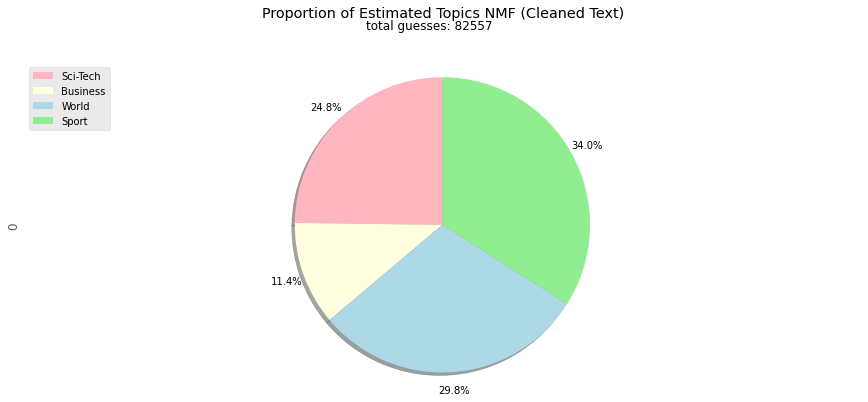

In [ ]:
# autopct create %, start angle represent starting point
A_C_NMF = [counterTech_C_NMF,counterBusiness_C_NMF,counterWorld_C_NMF,counterSport_C_NMF]
ArgMax_C_NMF = pd.DataFrame(A_C_NMF)

colors_list = ['lightpink', 'lightyellow', 'lightblue', 'lightgreen']

ArgMax_C_NMF[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            #)

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics NMF (Cleaned Text)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_C_NMF}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Sci-Tech', 'Business', 'World', 'Sport'], loc='upper left') 


plt.show()

#Neural Network approach 

##LTSM

In [ ]:
!pip install seqeval

import re                                   # 're' Replication of text.
import numpy as np                          
import pandas as pd                         # 'pandas' to manipulate the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                       # 'seaborn' to visualize the dataset.
import tensorflow as tf
from tensorflow.keras.models import Sequential                # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense     # import some layers for training.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 270 kB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=45e9e81f0e6069349997d32a8204e66bd374bda55ad12356f347c4df3fcba38e
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


###Preparing the text for feeding into algorithm.

In [ ]:
X_train, X_test = df_train['Text Cleaned'], df_test['Text Cleaned']

In [ ]:
Y_train = pd.get_dummies(df_train['Topic']).values
Y_test = pd.get_dummies(df_test['Topic']).values

In [ ]:
tokenizer = Tokenizer(num_words = 5000)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

max_len = 50

X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
X_test = pad_sequences(X_test, padding = 'post', maxlen = max_len)

###Preparing GloVe Embeddings to use them in training the model.

In [ ]:
embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Text_Mining/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
X_train.shape

(120000, 50)

###Define Layers and Compile

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
 100,
 weights=[embedding_matrix],
 input_length=MAX_LENGTH,
 trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 100)           7169600   
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 7,287,364
Trainable params: 117,764
Non-trainable params: 7,169,600
_________________________________________________________________
None


####Fit the model with '6' epochs having batch size of '128' reviews and '20%' of validation data.

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 5, verbose = 1,validation_split = 0.2)

Epoch 1/5
938/938 [==============================] - 188s 198ms/step - loss: 0.4229 - accuracy: 0.8565
Epoch 2/5
938/938 [==============================] - 186s 198ms/step - loss: 0.3262 - accuracy: 0.8891
Epoch 3/5
938/938 [==============================] - 181s 193ms/step - loss: 0.3036 - accuracy: 0.8960
Epoch 4/5
938/938 [==============================] - 182s 194ms/step - loss: 0.2856 - accuracy: 0.9013
Epoch 5/5
938/938 [==============================] - 182s 194ms/step - loss: 0.2738 - accuracy: 0.9046


In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)

238/238 [==============================] - 4s 15ms/step - loss: 0.2919 - accuracy: 0.9024


In [ ]:
model.save("Model1.2")

####Model Performance Visualization using Matplotlib

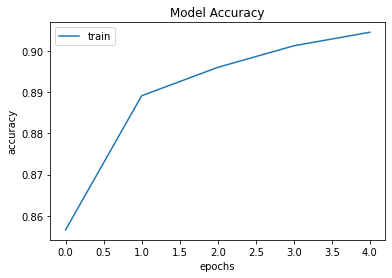

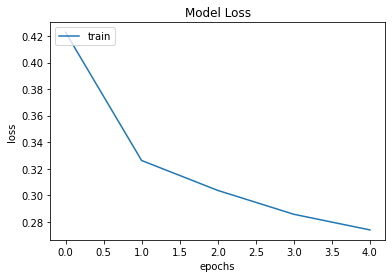

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

#BERT

In [ ]:
!pip install -q transformers datasets

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
df_train = df_train.rename(columns = {'Topic' : 'label', 'Text Cleaned' : 'text_cleaned'})
df_test = df_test.rename(columns = {'Topic' : 'label', 'Text Cleaned' : 'text_cleaned'})

bert_train = df_train[['label', 'text_cleaned']][:96000]
bert_validation = df_train[['label', 'text_cleaned']][96000:]
bert_test = df_test[['label', 'text_cleaned']]

In [ ]:
bert_train.tail()

label                                       text_cleaned
95995      4  jak trades master fun late installment playsta...
95996      4  advertiser muscle rss s escaping advertising m...
95997      4  stem cells feed brain tumors researcher discov...
95998      4  wisconsin invest stem cells californias state ...
95999      4  fossil find spain link great apes fossils ape ...

In [ ]:
bert_validation.head()

label                                       text_cleaned
96000      4  run extra mile set humans apart primates world...
96001      2  harris miami upend florida anthony harris scor...
96002      4  evidence hints early human americas archaeolog...
96003      4  joseph weiss originator theory facing trauma d...
96004      1  aishwarya rai star hollywood blockbuster taj m...

In [ ]:
bert_train= pd.get_dummies(bert_train, columns = ['label'])
bert_validation= pd.get_dummies(bert_validation, columns = ['label'])
bert_test= pd.get_dummies(bert_test, columns = ['label'])

In [ ]:
bert_train

text_cleaned  label_1  label_2  \
0      wall st bears claw black shortsellers wall str...        0        0   
1      carlyle look commercial aerospace private inve...        0        0   
2      oil economy cloud stocks outlook soar crude pr...        0        0   
3      iraq halts oil exports main southern pipeline ...        0        0   
4      oil price soar alltime record pose new menace ...        0        0   
...                                                  ...      ...      ...   
95995  jak trades master fun late installment playsta...        0        0   
95996  advertiser muscle rss s escaping advertising m...        0        0   
95997  stem cells feed brain tumors researcher discov...        0        0   
95998  wisconsin invest stem cells californias state ...        0        0   
95999  fossil find spain link great apes fossils ape ...        0        0   

       label_3  label_4  
0            1        0  
1            1        0  
2            1        0  
3            1        0  
4            1        0  
...        ...      ...  
95995        0        1  
95996        0        1  
95997        0        1  
95998        0        1  
95999        0        1  

[96000 rows x 5 columns]

In [ ]:
bert_train = bert_train.rename(columns = {'label_1' : 'Word', 'label_2': 'Sport', 'label_3' : 'Business', 'label_4' : 'Sci-Tech'})
bert_validation = bert_validation.rename(columns = {'label_1' : 'Word', 'label_2': 'Sport', 'label_3' : 'Business', 'label_4' : 'Sci-Tech'})
bert_test = bert_test.rename(columns = {'label_1' : 'Word', 'label_2': 'Sport', 'label_3' : 'Business', 'label_4' : 'Sci-Tech'})

In [ ]:
bert_train

text_cleaned  Word  Sport  \
0      wall st bears claw black shortsellers wall str...     0      0   
1      carlyle look commercial aerospace private inve...     0      0   
2      oil economy cloud stocks outlook soar crude pr...     0      0   
3      iraq halts oil exports main southern pipeline ...     0      0   
4      oil price soar alltime record pose new menace ...     0      0   
...                                                  ...   ...    ...   
95995  jak trades master fun late installment playsta...     0      0   
95996  advertiser muscle rss s escaping advertising m...     0      0   
95997  stem cells feed brain tumors researcher discov...     0      0   
95998  wisconsin invest stem cells californias state ...     0      0   
95999  fossil find spain link great apes fossils ape ...     0      0   

       Business  Sci-Tech  
0             1         0  
1             1         0  
2             1         0  
3             1         0  
4             1         0  
...         ...       ...  
95995         0         1  
95996         0         1  
95997         0         1  
95998         0         1  
95999         0         1  

[96000 rows x 5 columns]

In [ ]:
train = Dataset.from_pandas(bert_train)
validation = Dataset.from_pandas(bert_validation)
test = Dataset.from_pandas(bert_test)

In [ ]:
dataset = DatasetDict({"train" : train, "validation" : validation, "test" : test})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text_cleaned', 'Word', 'Sport', 'Business', 'Sci-Tech'],
        num_rows: 96000
    })
    validation: Dataset({
        features: ['text_cleaned', 'Word', 'Sport', 'Business', 'Sci-Tech'],
        num_rows: 24000
    })
    test: Dataset({
        features: ['text_cleaned', 'Word', 'Sport', 'Business', 'Sci-Tech'],
        num_rows: 7600
    })
})

In [ ]:
example = dataset['train'][0]
example

{'text_cleaned': 'wall st bears claw black shortsellers wall streets dwindle band ultracynic green',
 'Word': 0,
 'Sport': 0,
 'Business': 1,
 'Sci-Tech': 0}

In [ ]:
labels = [label for label in dataset['train'].features.keys() if label not in ['text_cleaned']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['Word', 'Sport', 'Business', 'Sci-Tech']

In [ ]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["text_cleaned"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

  0%|          | 0/96 [00:00<?, ?ba/s]

  0%|          | 0/24 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
tokenizer.decode(example['input_ids'])

'[CLS] wall st bears claw black shortsellers wall streets dwindle band ultracynic green [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
example['labels']

[0.0, 0.0, 1.0, 0.0]

In [ ]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['Business']

In [ ]:
encoded_dataset.set_format("torch")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
batch_size = 8
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [ ]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [ ]:
encoded_dataset['train']['input_ids'][0]

tensor([  101,  2813,  2358,  6468, 15020,  2304,  9132, 24038,  2015,  2813,
         4534,  1040, 11101,  2571,  2316, 11087,  5666,  8713,  2665,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.7204, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.3896,  0.3447,  0.0745,  0.2528]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 96000
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 60000
  Number of trainable parameters = 109485316
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


***** Running Evaluation *****
  Num examples = 24000
  Batch size = 8
Saving model checkpoint to bert-finetuned-sem_eval-english/checkpoint-12000
Configuration saved in bert-finetuned-sem_eval-english/checkpoint-12000/config.json
Model weights saved in bert-finetuned-sem_eval-english/checkpoint-12000/pytorch_model.bin
tokenizer config file saved in bert-finetuned-sem_eval-english/checkpoint-12000/tokenizer_config.json
Special tokens file saved in bert-finetuned-sem_eval-english/checkpoint-12000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 24000
  Batch size = 8
Saving model checkpoint to bert-finetuned-sem_eval-english/checkpoint-24000
Configuration saved in bert-finetuned-sem_eval-english/checkpoint-24000/config.json
Model weights saved in bert-finetuned-sem_eval-english/checkpoint-24000/pytorch_model.bin
tokenizer config file saved in bert-finetuned-sem_eval-english/checkpoint-24000/tokenizer_config.json
Special tokens file saved in bert-finetuned-sem_eval